In [ ]:
# Load the data folder in the share drives
# The data folder is in the 'drive/Shareddrives/Ada'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
# installing required packages
!pip install pandas==1.0.5
!pip install textblob


     |████████████████████████████████| 10.1 MB 5.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


In [ ]:
# Import needed libraries:

import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import warnings
import pickle
import shutil
import os
import glob
import wordcloud
import nltk
import re
warnings.filterwarnings('ignore')
import requests 
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import sys
import spacy
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim (for LDA)
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import plotly.express as px

#URL parsing
from urllib.parse import parse_qsl, urljoin, urlparse

#Plots
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Date
from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# loading NLTK Stop words

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Import Data

In [ ]:
# importing the processed/picked  data:
df=pd.read_pickle('/content/drive/Shareddrives/Ada/Uniform/All_attribute_version1312.pkl')

In [ ]:
#printing the first lines:
df.head()

,id,quoteID,quotation,speaker,probas,date,numOccurrences,urls,phase,label,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,religion,polarity_TextBlob,polarity_SentimentIntensityAnalyze,polarity_Flair,polarity,emotion,day,year,just_date,domains,TLD,domain_country
0,Q20251661,2020-01-31-011304,Brexit is the victory of the common people aga...,Laura Huhtasaari,"[[Laura Huhtasaari, 0.9325], [None, 0.059], [P...",2020-01-31 03:25:04,1,[http://voanews.com/europe/shrug-and-some-sorr...,E,Laura Huhtasaari,[+1979-03-30T00:00:00Z],Finland,female,0,politician,Finns Party,0,Lutheranism,-0.022619,0.5719,0.663805,0.571900,positive,2020-01-31,2020,2020-01-31,[voanews.com],com,NaN
1,Q694676,2020-02-13-014393,Certainly Brexit was a big issue and people we...,Pat McFadden,"[[Pat McFadden, 0.9371], [None, 0.0535], [Jere...",2020-02-13 06:01:30,1,[http://www.expressandstar.com/news/politics/2...,E,Pat McFadden,[+1965-03-26T00:00:00Z],United Kingdom,male,0,politician,Labour Party,0,0,-0.161905,-0.2500,0.997470,-0.161905,negative,2020-02-13,2020,2020-02-13,[www.expressandstar.com],com,NaN
2,Q1341937,2020-03-08-010480,"I backed leave and voted leave, but I never ca...",Jason McCartney,"[[Jason McCartney, 0.8274], [None, 0.128], [Li...",2020-03-08 05:45:58,1,[http://www.yorkshirepost.co.uk/news/second-ti...,E,Jason McCartney,[+1973-09-03T00:00:00Z],United States of America,male,0,sport cyclist,0,0,0,0.000000,-0.4243,0.595703,0.000000,negative,2020-03-08,2020,2020-03-08,[www.yorkshirepost.co.uk],uk,United Kingdom
3,Q6837191,2020-02-14-058019,"legacy, bad faith on pensions, Brexit and poli...",Michelle O'Neill,"[[Michelle O'Neill, 0.8055], [None, 0.1302], [...",2020-02-14 11:48:49,1,[https://www.belfasttelegraph.co.uk/news/north...,E,Michelle O'Neill,[+1977-01-10T00:00:00Z],Northern Ireland,female,0,politician,Sinn Féin,0,0,-0.233333,-0.0516,0.951277,-0.051600,negative,2020-02-14,2020,2020-02-14,[www.belfasttelegraph.co.uk],uk,United Kingdom
4,Q1728820,2020-01-27-094916,"we're only at half-time on Brexit, it's not do...",Leo Varadkar,"[[Leo Varadkar, 0.9378], [None, 0.0502], [Bori...",2020-01-27 12:25:00,1,[http://blogs.independent.co.uk/voices/brexit-...,E,Leo Varadkar,[+1979-01-18T00:00:00Z],Ireland,male,0,politician,Fine Gael,0,0,0.000000,0.0000,0.946059,0.000000,negative,2020-01-27,2020,2020-01-27,[blogs.independent.co.uk],uk,United Kingdom


In [ ]:
# printing all the columns:
df.columns

Index(['id', 'quoteID', 'quotation', 'speaker', 'probas', 'date',
       'numOccurrences', 'urls', 'phase', 'label', 'date_of_birth',
       'nationality', 'gender', 'ethnic_group', 'occupation', 'party',
       'academic_degree', 'religion', 'polarity_TextBlob',
       'polarity_SentimentIntensityAnalyze', 'polarity_Flair', 'polarity',
       'emotion', 'day', 'year', 'just_date', 'domains', 'TLD',
       'domain_country'],
      dtype='object')

#DATA STORY/ Pipeline:
**I - The media's coverage of Brexit from 2015 to 2020 considering data in Quotebank:**


1. How many quotations are related to Brexit?
2. When did the media start to mention Brexit? 
3. How did the number of quotations change over time?

  
**II - Media views towards Brexit:**


1. Which media have relayed the information the most?
2. What is the country of origin of these media?
3. What media and websites tend to have positive or negative statements towards the situation?
4. How sentiments of quotations revealed by top 10 medias change over recent years? 


**III - Who issued these quotes, and what were the main opinions:**


1.  Plot: Word cloud of the quotation :
2. How many active speakers are mentioned?
3. Most active speaker with different Sentiment towards Brexit
4. What are the main topics discussed
5. Where do they come from?
6.  How has the number of active speakers changed over the different periods of Brexit? 
7. What is their sentiment about the situation, content or not content, independently of their opinion on pro or against Brexit?
8. Did they change their perception during this period?
9. How are the different sentiments of the speakers distributed by countries?


# Methods: 

* To merge quotebank with the additional datasets, we have filtered those quotations related to Brexit by identifying possible keywords related to Brexit. We have already combined quotations with speaker attributes by joining with QIDs.  We also scrapped [the web page](https://icannwiki.org/Country_code_top-level_domain) to get the domain countries using beautiful soup for future analysis.


* We then carried out a sentiment analysis, for that we used the results of three packages: Textblob, SentimentIntensityAnalyze and Flair. We have then taken the median of the three resulting polarities. To subsequently decide on the thresholds to choose for classifying the emotions (Positive, Negative, or Neutral), we manually labeled 100 quotes and selected the thresholds accordingly.  It is critical to note that the resulting emotion does not reflect the direct view or perception of the Brexit, i.e. pro or con. The resulting emotion is based on the tone of the quote. As an example (fabricated), the two quotes: "Brexit is crucial, staying in the union would be a catastrophe, a suicide" and "Staying in the union is crucial, leaving would be a catastrophe, a suicide" will both be assigned a negative emotion by design even though they stand for two different opinions.


* We also performed an LDA topic modeling to get an insight about the most relevant subjects. This approach allowed us to notice clearly the different names involved with Brexit like Theresa May, Boris Johnson, Donald Trump, David Cameron etc..

  Also, this analysis revealed some major keywords that allowed us to get some ideas about what was beeing discussed.

   We can see that some of the speakers are projecting the Brexit as an opportunity for a better change, and some of them are reflecting all the risks that may accure, stating words like (risk, damage, lose, crisis, impact etc..).
And also, we can see how some keywords are reflecting the will the stay in europe (partners, stay, deal, relationship, members etc).

  But, this was not enough for us since we thout it would be more interesting to see the position of the most involved speakers with Brexit.

  That's why we looked at the the most active ones and divided our research into 3 different timelines:
  - just before the referendum (before 2016-06-20)
  - period of referendum (from 2016-06-21 to 2016-06-25) 
  - and just after (after 2016-06-26)

  And at the same time, we were interested in answering these questions:

  1) From which countries are speakers the most interested in Brexit?

  2) Who are the most relevant speakers?

  3) What's their opinion during those different periods?


  The distribution of quotations by speakers' nationality confirmed our hypothesis: countries with the most interest with United Kingdom are the most involved with the Brexit situation. 

  We also distinguished the main speakers by their activity throughout the Brexit period of time.
  

  Our analysis just allowed ton conclude more about the position of the most relevant speakers at that time.

  


* Spectral clustering was applied for speakers and for different subclasses of occupation over time.  We first encoded the category features-nationality, polarity, and occupation-using two methods: hot encoding and target encoding. We then used the T-SNE method to compress the features and generate tsne_x,tesn_y so that they could be plotted in 2D or 3D graphs. We obtained some plots and results, but we will leave the final interpretation and more advanced implementation of the T-SNE approach to be done as a future improvement of our T-SNE method. You can find the first results, uncommented, of the cluster analysis at the end of this notebook. 

-----------
## I. Media's Coverage


### I.1 How many quotations are related to Brexit?  

The original Quotebanks dataset contains 115,584,257 records.
As described in the DataPreProcessing notebook, we initially extracted quotes that were solely about Brexit, the United Kingdom and/or the European Union. We then proceeded with filtering these records to consider only those containing one of the words from the following list: leave campaign and remain campaign, no deal, transition period, leave, withdral, referendum and split from as Brexit-related quotes. 

As a result, we ended up with 101,878 Brexit-related citations for more in-depth analysis.

In [ ]:
print("The number of Quotation related to Brexit is {}".format(df.shape[0]))

The number of Quotation related to Brexit is 101878


In [ ]:
print("The number of all Quotation is {}".format(nb_quatations))

The number of all Quotation is 115584257


### I.2 When did the media start to mention Brexit?


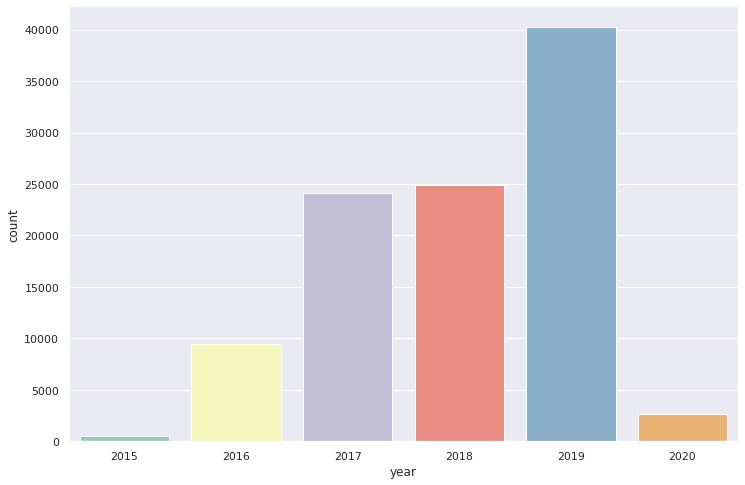

In [ ]:
# plotting Barplot of the total number of Brexit quotation per year:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="year", data=df,palette="Set3")
plt.show()

Looking at the proportion of each year

In [ ]:
percentages=df.groupby(['year'])['id'].count()
percentages=percentages.tolist()
percentages = [x * 100/101878 for x in percentages]
print("Percentages of quote representation during year : \n 2015={:.2f} % \n 2016={:.2f}% \n 2017={:.2f}% \n 2018={:.2f}% \n 2019={:.2f}% \n 2020={:.2f}% \n".format(percentages[0],percentages[1],percentages[2],percentages[3],percentages[4],percentages[5]))

Percentages of quote representation during year : 
 2015=0.50 % 
 2016=9.28% 
 2017=23.69% 
 2018=24.46% 
 2019=39.51% 
 2020=2.56% 



Always considering the filtered Quotebank data, the graph above represents the number of citations related to the Brexit over the years. We first notice that before 2015, only a few hundred citations were related to Brexit (only 0.5% of the Brexit data present in Quotebank). This switches in 2016 (9.28%) - the year when the Brexit was voted-  and we can see that until 2019, the number of citations will keep increasing until waiting for its peak reaching (39.51% of the total data). Yet in 2020, we witness a sharp drop. We suggest that this is because most news stories were relaying information about the coronavirus at that time. Another theory would be that the data was not completely extracted from year 2020. 


In order to further analyze this trend over the years, we look at what happens each year while looking at the dates that marked the Brexit.



### I.3   How did the number of quotations change over time? 
We are interested in looking at how the number of quotation change over time with more details and consider how some important dates may have affected the occurence of quotations.


In [ ]:
# load the data and aggregate them by day:
df_timeseries=df.groupby(['just_date'])['id'].count().reset_index().rename(columns={'just_date':'date','id':'counts'})
df_timeseries

,date,counts
0,2015-01-01,1
1,2015-01-04,1
2,2015-01-07,2
3,2015-01-08,2
4,2015-01-14,2
...,...,...
1637,2020-04-12,1
1638,2020-04-13,2
1639,2020-04-14,3
1640,2020-04-15,2


In [ ]:
# creating the right set up to use plotly since we want all our plot exported to our website
keydates = list()
for i in (datetime(2016, 6, 23),datetime(2016,7,13),datetime(2017,3,29),datetime(2018,11,25),datetime(2017,12,8),datetime(2019,6,24),datetime(2019,7,24),datetime(2019,8,28),datetime(2019,10,2),datetime(2019,10,19),datetime(2020,1,31),datetime(2020,10,16)):
    keydates.append({'type': 'line',
                     'line': dict(
                        color="red",
                        width=0.6,
                    ),
                    'xref': 'x',
                    'yref': 'y',
                    'x0': i,
                    'y0': 0,
                    'x1': i,
                    'y1': 600})

# Scatter plot:
timeseries_data = go.Scatter(x=df_timeseries['date'],
                        y=df_timeseries['counts'].values,
                        line=go.scatter.Line(color='blue', width = 0.6),
                           opacity=0.8,
                           name='number of quotations',
                           text=[f'number of quotations: {x:.0f}' for x in df_timeseries['counts'].values])


# Create a layout with a rangeselector and rangeslider on the xaxis
layout = go.Layout(font=dict(size=18),
                   title='Number of quotations change over time',
                   xaxis=dict(title='Date',
                                        # Initialisen range selector
                                         rangeselector=dict(
                                             # Buttons for selecting time scale
                                             buttons=list([
                                                 # button for 1 month
                                                 dict(count=1,
                                                      label='1m',
                                                      step='month',
                                                      stepmode='backward'),
                                                 # button for 1 week
                                                 dict(count=7,
                                                      label='1w',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # button for 1 day
                                                 dict(count=1,
                                                      label='1d',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # button for all days
                                                 dict(step='all')
                                             ])
                                         ),
                                         # create the range slider
                                         rangeslider=dict(visible=True),
                                         type='date'), 
                   shapes=keydates,
                   yaxis=dict(title='Number of quotations')
                   )

fig = go.Figure(data=[timeseries_data], layout=layout)
iplot(fig)

In the graph above, we can see the number of quotes related to Brexit over time.
 The red vertical lines correspond to the following important dates:
  - *June 23, 2016* - The UK votes to leave in a referendum. The "Leave" camp, which favors the UK's exit from the EU, won with 51.9%, compared to 48.1% for the pro-EU "Remain" camp.
  - *July 13, 2016* - Theresa May becomes Prime Minister following the resignation of David Cameroon. 
  - *March 29, 2017* - Warning: two-year countdown to the UK's exit from the European Union. The UK is then negotiating an exit agreement. 
  - *December 8, 2017* - Birth of the backstop: tensions form on Irish borders. In the event of an exit without an agreement of the United Kingdom from the EU, the 500 kilometers that separate the British province of Northern Ireland from the Republic of Ireland could become a physical border again. As London has decided to leave the single market and the customs union, which are synonymous with freedom of movement and common standards and customs duties, border controls will be necessary. However, this return to a border between the two countries would weaken the Good Friday Peace Agreement, which ended, in 1998, thirty years of armed conflict between nationalists and unionists in Northern Ireland.
  - *November 25, 2018*- After a period of calm, the subject of the Backstop resurfaces a second time. 
  - *June 24, 2019* - May takes a bow: Theresa May submits her resignation, following her failure to pass her plan to withdraw from the European Union.
  - *July 24, 2019*- the Johnson era begins: Boris Johnson is elected leader of the Conservative Party the following year, he succeeds Theresa May as Prime Minister, promising a rapid exit of the United Kingdom from the European Union.
  - *28 August 2019*- Parliament put on ice for 5 weeks: In August, reports emerged that the new PM had asked the Queen to suspend Parliament for five weeks in the run-up to 31 October.
  - *2 October 2019* - Johnson sets out his ‘reasonable compromise’ Brexit deal: By early October, the PM had made a formal proposal to the EU setting out his alternative to the Irish backstop. He claimed his plan was “entirely compatible with maintaining an open border in Northern Ireland”, unlike the “bridge to nowhere” backstop.
  - *19 October 2019* - the showdown: Parliament hosted a special session for MPs on Saturday 19 October - less than two weeks before the Halloween Brexit deadline. It was the fifth time Parliament sat on a Saturday for 80 years, with the previous occasions including include the day before the outbreak of the Second World War, the Suez Crisis in 1956 and the Falklands War in 1982, says The Guardian. Johnson was legally obliged by the Benn Act to send a letter to the EU on that date requesting a three-month Brexit extension after Parliament refused to pass his deal.
  - *31 January 2020* – departure day: Having won the majority he so desired in December, Johnson passes his withdrawal agreement, paving the way for the UK to leave the EU on 31 January.
  - *16 October* – Johnson backs away: after multiple events, Johnson says the UK should “go for the Australia solution” as he announced that it’s time to “get ready" for the prospect of no-deal Brexit.

source: https://www.theweek.co.uk/100284/brexit-timeline-key-dates-in-the-uk-s-break-up-with-the-eu


On the graph, we can see that before the vote on June 23, 2016, the number of citations was very limited. The number started to increase until July 13, 2016, the day Theresa May became PM, before dropping again and entering a stationary phase. 
We anticipated seeing more dramatic variations in the number of quotes tying in with these specific dates, though we must keep in mind that the plot only considers data from Quotebank, which may not represent what is actually shared by all media outlets.


In [ ]:
# render a html link to add the plot to our website 
fig.write_html("/content/drive/Shareddrives/Ada/output_plots/keydates_timeseries.html")